In [2]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from datetime import date, datetime, timedelta

In [13]:
path_earning_call_analysts_question=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_analysts_question_sentiment.csv'
path_earning_call_executives_answer=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_executives_answer_sentiment.csv'
path_earning_call_presentation_all_sentiment=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_presentation_all_sentiment.csv'
path_tesla_impliedborrowfee=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_impliedborrowfee.csv'

In [12]:
data_call_executives_answer_all=pd.read_csv(path_earning_call_executives_answer)
data_call_executives_answer_all['call_datetime']=\
pd.to_datetime(data_call_executives_answer_all['call_datetime'], format='%Y-%m-%d')
data_call_executives_answer_all=data_call_executives_answer_all.sort_values('call_datetime')

data_call_executives_answer_all=\
data_call_executives_answer_all[(data_call_executives_answer_all['call_datetime'] >= datetime(2010, 11, 9))&\
                           (data_call_executives_answer_all['call_datetime'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [14]:
data_call_analyst_question_all=pd.read_csv(path_earning_call_analysts_question)
data_call_analyst_question_all['call_datetime']=\
pd.to_datetime(data_call_analyst_question_all['call_datetime'], format='%Y-%m-%d')
data_call_analyst_question_all=data_call_analyst_question_all.sort_values('call_datetime')

In [4]:
data_call_presentation_all=pd.read_csv(path_earning_call_presentation_all_sentiment)
data_call_presentation_all['call_datetime']=\
pd.to_datetime(data_call_presentation_all['call_datetime'], format='%Y-%m-%d')
data_call_presentation_all=data_call_presentation_all.sort_values('call_datetime')

In [5]:
data_call_presentation_all['call_datetime'].min(),\
data_call_presentation_all['call_datetime'].max()

(Timestamp('2010-11-09 00:00:00'), Timestamp('2023-10-18 00:00:00'))

In [6]:
data_call_presentation_all=\
data_call_presentation_all[(data_call_presentation_all['call_datetime'] >= datetime(2010, 11, 9))&\
                           (data_call_presentation_all['call_datetime'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [7]:
impliedborrowfee=pd.read_csv(path_tesla_impliedborrowfee)
impliedborrowfee['date']=\
pd.to_datetime(impliedborrowfee['date'], format='%Y-%m-%d')
impliedborrowfee=impliedborrowfee.sort_values('date')

In [8]:
impliedborrowfee=\
impliedborrowfee[(impliedborrowfee['date'] >= datetime(2010, 11, 9))&\
                 (impliedborrowfee['date'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [9]:
impliedborrowfee

,date,days,delta_call,impl_volatility_call,delta_put,impl_volatility_put,impliedfee,impliedfeefivedaymoving
0,2010-11-09,30,50,0.488466,-50,0.747213,36.005695,39.794999
1,2010-11-10,30,50,0.486275,-50,0.781504,41.082313,39.161625
2,2010-11-11,30,50,0.527946,-50,0.733993,28.672276,38.094397
3,2010-11-12,30,50,0.557881,-50,0.802888,34.093718,36.616720
4,2010-11-15,30,50,0.629934,-50,0.906521,38.488203,35.668441
...,...,...,...,...,...,...,...,...
3091,2023-02-22,30,50,0.711583,-50,0.705976,-0.780237,0.263725
3092,2023-02-23,30,50,0.677816,-50,0.670870,-0.966564,-0.204083
3093,2023-02-24,30,50,0.663831,-50,0.662809,-0.142215,-0.240514
3094,2023-02-27,30,50,0.663550,-50,0.661413,-0.297372,-0.657141


In [21]:
data_call_analyst_question_all

,time,call_datetime,call_year,call_month,call_day,company_name,company,quarter,year_quarter,analysts_question,analyst_text,analyst_text_removestopwords,analyst_neg,analyst_pos,analyst_neu
0,"Tuesday, November 09, 2010 10:00 PM GMT",2010-11-09,2010,11,9,Tesla Motors,"Tesla Motors, Inc., Q3 2010 Earnings Call, Nov...",Q3,2010,"I just wanted to, a couple of questions. On th...","['I', 'just', 'wanted', 'to', 'a', 'couple', '...","['I', 'wanted', 'couple', 'questions', 'On', '...",0.018,0.056,0.925
1,"Tuesday, February 15, 2011 10:00 PM GMT",2011-02-15,2011,2,15,Tesla Motors,"Tesla Motors, Inc., Q4 2010 Earnings Call, Feb...",Q4,2010,Just wanted to think about how should we think...,"['Just', 'wanted', 'to', 'think', 'about', 'ho...","['Just', 'wanted', 'think', 'think', 'cost', '...",0.004,0.064,0.933
2,"Wednesday, May 04, 2011 9:00 PM GMT\nS&P",2011-05-04,2011,5,4,Tesla Motors,"Tesla Motors, Inc., Q1 2011 Earnings Call, May...",Q1,2011,"So I guess a couple questions, maybe first on ...","['o', 'I', 'guess', 'a', 'couple', 'questions'...","['I', 'guess', 'couple', 'questions', 'maybe',...",0.015,0.100,0.885
3,"Wednesday, August 03, 2011 9:30 PM GMT\n",2011-08-03,2011,8,3,Tesla Motors,"Tesla Motors, Inc., Q2 2011 Earnings Call, Aug...",Q2,2011,A couple of questions. I noticed the margins o...,"['couple', 'of', 'questions', 'I', 'noticed', ...","['couple', 'questions', 'I', 'noticed', 'margi...",0.009,0.113,0.877
4,"Wednesday, November 02, 2011 9:30 PM GM",2011-11-02,2011,11,2,Tesla Motors,"Tesla Motors, Inc., Q3 2011 Earnings Call, Nov...",Q3,2011,"Elon, first question, the long-term supply con...","['lon', 'first', 'question', 'the', 'long', 't...","['lon', 'first', 'question', 'long', 'term', '...",0.021,0.099,0.880
5,"Wednesday, February 15, 2012 10:30 PM G",2012-02-15,2012,2,15,Tesla Motors,"Tesla Motors, Inc., Q4 2011 Earnings Call, Feb...",Q4,2011,"Amir Rozwadowski\nBarclays Bank PLC, Research ...","['mir', 'Rozwadowski', 'arclays', 'ank', 'C', ...","['mir', 'Rozwadowski', 'arclays', 'ank', 'C', ...",0.016,0.089,0.895
6,"Wednesday, May 09, 2012 9:30 PM GMT\nS&P",2012-05-09,2012,5,9,Tesla Motors,"Tesla Motors, Inc., Q1 2012 Earnings Call, May...",Q1,2012,"Amir Rozwadowski\nBarclays Bank PLC, Research ...","['mir', 'Rozwadowski', 'arclays', 'ank', 'C', ...","['mir', 'Rozwadowski', 'arclays', 'ank', 'C', ...",0.026,0.119,0.855
7,"Wednesday, July 25, 2012 9:30 PM GMT\nS&",2012-07-25,2012,7,25,Tesla Motors,"Tesla Motors, Inc., Q2 2012 Earnings Call, Jul...",Q2,2012,"I just wondered -- so I wanted to, in terms of...","['I', 'just', 'wondered', 'so', 'I', 'wanted',...","['I', 'wondered', 'I', 'wanted', 'terms', 'ram...",0.026,0.110,0.864
8,"Monday, November 05, 2012 1:00 PM GMT\nS",2012-11-05,2012,11,5,Tesla Motors,"Tesla Motors, Inc., Q3 2012 Earnings Call, Nov...",Q3,2012,"First question, how many vehicles are coming c...","['First', 'question', 'how', 'many', 'vehicles...","['First', 'question', 'many', 'vehicles', 'com...",0.042,0.084,0.874
9,"Wednesday, February 20, 2013 10:30 PM G",2013-02-20,2013,2,20,Tesla Motors,"Tesla Motors, Inc., Q4 2012 Earnings Call, Feb...",Q4,2012,So I think one of the things that investors wi...,"['o', 'I', 'think', 'one', 'of', 'the', 'thing...","['I', 'think', 'one', 'things', 'investors', '...",0.034,0.094,0.872


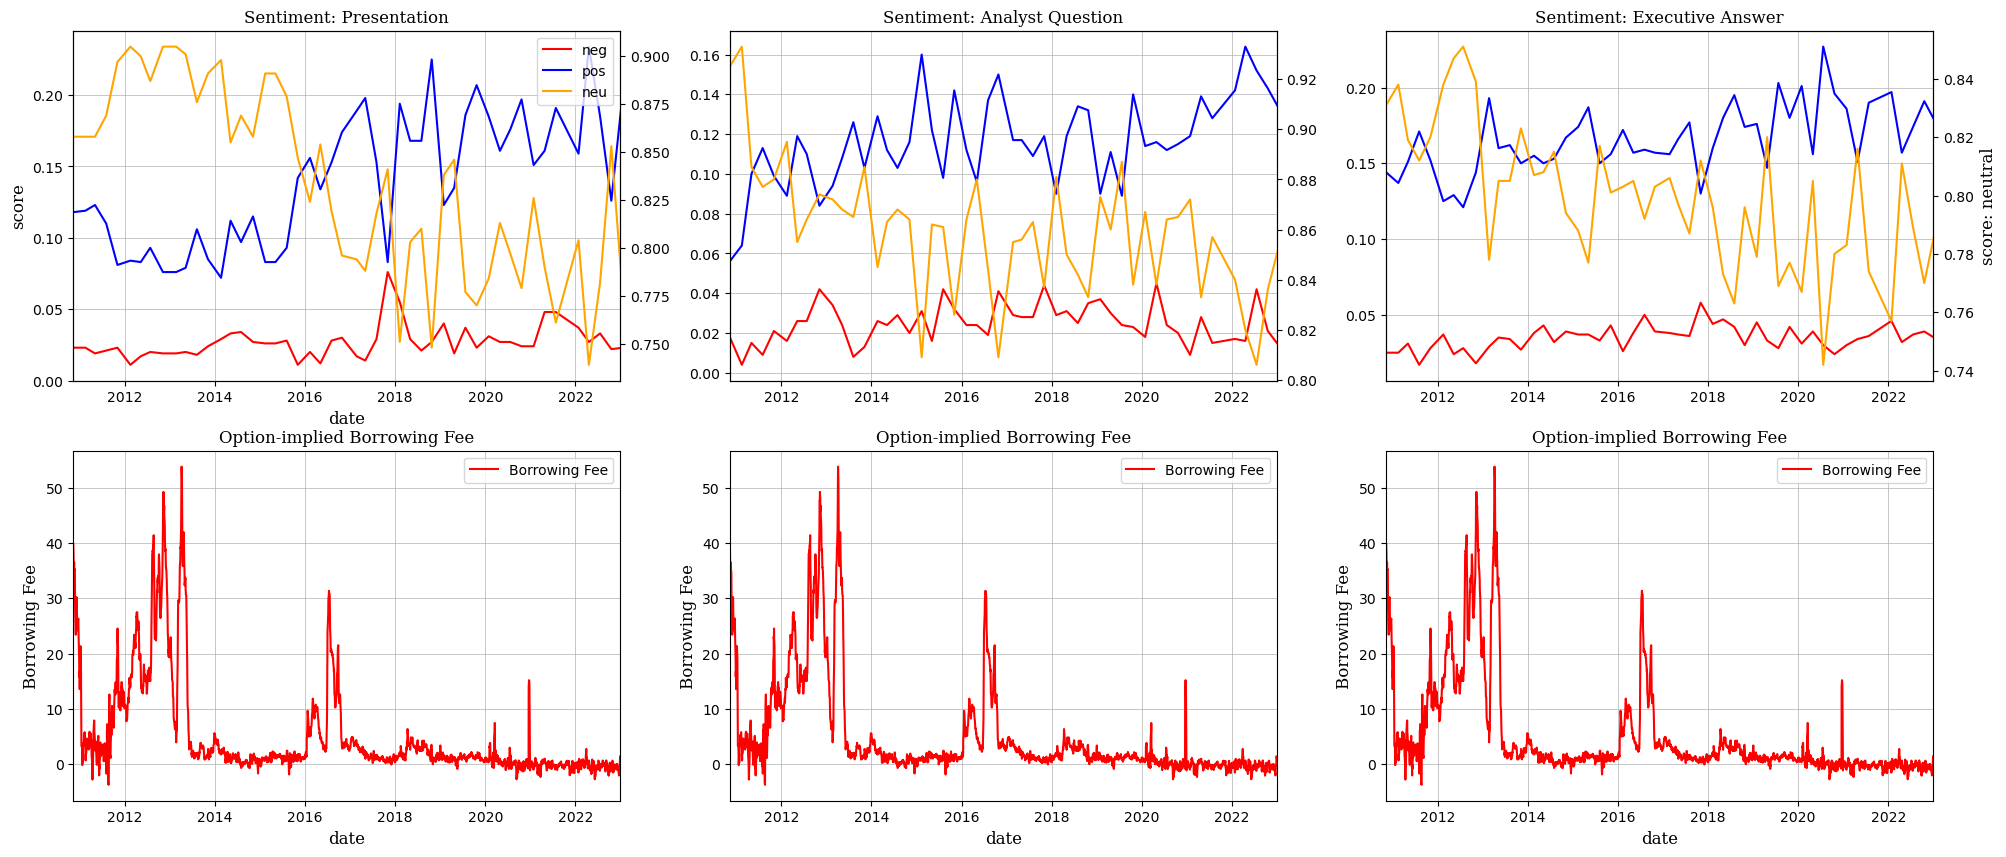

In [26]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([[ax1, ax2, ax3], [ax4, ax5, ax6]]) =\
plt.subplots(nrows = 2, ncols = 3, figsize = (24, 10))

lns1=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_presentation_all['call_datetime'],\
               data_call_presentation_all['presentationa_neu'], label='neu', color='orange')
# ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax4.plot(impliedborrowfee['date'],\
         impliedborrowfee['impliedfeefivedaymoving'], label='Borrowing Fee', color='r')

ax4.set_title("Option-implied Borrowing Fee", **csfont, size = sizetext)
ax4.set_ylabel('Borrowing Fee', size = sizetext, **csfont)
ax4.set_xlabel('date', size = sizetext, **csfont)
ax4.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax4.grid(linewidth=0.5)
ax4.legend()



lns1=\
ax2.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_neg'], color='r')
lns2=\
ax2.plot(data_call_analyst_question_all['call_datetime'],\
         data_call_analyst_question_all['analyst_pos'], color='b')

ax2.set_title("Sentiment: Analyst Question", **csfont, size = sizetext)
# ax2.set_ylabel('score', size = sizetext, **csfont)
# ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax2.grid(linewidth=0.5)
# ax2.legend()

ax22 = ax2.twinx()
lns3=ax22.plot(data_call_analyst_question_all['call_datetime'],\
               data_call_analyst_question_all['analyst_neu'], color='orange')
# ax22.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
# ax22.legend(lns, labs, loc=1)

ax5.plot(impliedborrowfee['date'],\
         impliedborrowfee['impliedfeefivedaymoving'], label='Borrowing Fee', color='r')

ax5.set_title("Option-implied Borrowing Fee", **csfont, size = sizetext)
ax5.set_ylabel('Borrowing Fee', size = sizetext, **csfont)
ax5.set_xlabel('date', size = sizetext, **csfont)
ax5.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax5.grid(linewidth=0.5)
ax5.legend()


lns1=\
ax3.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_neg'], color='r')
lns2=\
ax3.plot(data_call_executives_answer_all['call_datetime'],\
         data_call_executives_answer_all['executive_pos'], color='b')

ax3.set_title("Sentiment: Executive Answer", **csfont, size = sizetext)
# ax2.set_ylabel('score', size = sizetext, **csfont)
# ax2.set_xlabel('date', size = sizetext, **csfont)
ax3.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax3.grid(linewidth=0.5)
# ax2.legend()

ax33 = ax3.twinx()
lns3=ax33.plot(data_call_executives_answer_all['call_datetime'],\
               data_call_executives_answer_all['executive_neu'], color='orange')
ax33.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]


ax6.plot(impliedborrowfee['date'],\
         impliedborrowfee['impliedfeefivedaymoving'], label='Borrowing Fee', color='r')

ax6.set_title("Option-implied Borrowing Fee", **csfont, size = sizetext)
ax6.set_ylabel('Borrowing Fee', size = sizetext, **csfont)
ax6.set_xlabel('date', size = sizetext, **csfont)
ax6.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax6.grid(linewidth=0.5)
ax6.legend()